In [1]:
import tensorflow as tf

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('iplabel.csv')

/home/krishna/anaconda3/envs/tfenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 85 columns):
Flow ID                         692703 non-null object
 Source IP                      692703 non-null object
 Source Port                    692703 non-null int64
 Destination IP                 692703 non-null object
 Destination Port               692703 non-null int64
 Protocol                       692703 non-null int64
 Timestamp                      692703 non-null object
 Flow Duration                  692703 non-null int64
 Total Fwd Packets              692703 non-null int64
 Total Backward Packets         692703 non-null int64
Total Length of Fwd Packets     692703 non-null int64
 Total Length of Bwd Packets    692703 non-null float64
 Fwd Packet Length Max          692703 non-null int64
 Fwd Packet Length Min          692703 non-null int64
 Fwd Packet Length Mean         692703 non-null float64
 Fwd Packet Length Std          692703 non-null float64
Bwd Packet Leng

In [7]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.14-209.48.71.168-49459-80-6,192.168.10.14,49459,209.48.71.168,80,6,5/7/2017 8:42,38308,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.3-192.168.10.17-389-49453-6,192.168.10.17,49453,192.168.10.3,389,6,5/7/2017 8:42,479,11,5,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.3-192.168.10.17-88-46124-6,192.168.10.17,46124,192.168.10.3,88,6,5/7/2017 8:42,1095,10,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.3-192.168.10.17-389-49454-6,192.168.10.17,49454,192.168.10.3,389,6,5/7/2017 8:42,15206,17,12,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.17-88-46126-6,192.168.10.17,46126,192.168.10.3,88,6,5/7/2017 8:42,1092,9,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [8]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,692693,692694,692695,692696,692697,692698,692699,692700,692701,692702
Flow ID,192.168.10.14-209.48.71.168-49459-80-6,192.168.10.3-192.168.10.17-389-49453-6,192.168.10.3-192.168.10.17-88-46124-6,192.168.10.3-192.168.10.17-389-49454-6,192.168.10.3-192.168.10.17-88-46126-6,192.168.10.3-192.168.10.17-389-49460-6,192.168.10.3-192.168.10.17-88-46131-6,192.168.10.16-91.189.88.161-37380-80-6,192.168.10.3-192.168.10.15-49666-49413-6,192.168.10.3-192.168.10.15-49666-49413-6,...,192.168.10.3-192.168.10.14-53-49378-17,192.168.10.16-72.21.91.29-35450-80-6,192.168.10.3-192.168.10.9-53-53123-17,172.16.0.1-192.168.10.50-45756-80-6,192.168.10.19-113.29.190.10-49346-80-6,192.168.10.3-192.168.10.14-53-51114-17,192.168.10.3-192.168.10.16-53-24054-17,192.168.10.51-23.208.163.130-58030-443-6,192.168.10.3-192.168.10.14-53-51694-17,192.168.10.3-192.168.10.14-53-57949-17
Source IP,192.168.10.14,192.168.10.17,192.168.10.17,192.168.10.17,192.168.10.17,192.168.10.17,192.168.10.17,192.168.10.16,192.168.10.15,192.168.10.3,...,192.168.10.14,72.21.91.29,192.168.10.9,172.16.0.1,113.29.190.10,192.168.10.14,192.168.10.16,23.208.163.130,192.168.10.14,192.168.10.14
Source Port,49459,49453,46124,49454,46126,49460,46131,37380,49413,49666,...,49378,80,53123,45756,80,51114,24054,443,51694,57949
Destination IP,209.48.71.168,192.168.10.3,192.168.10.3,192.168.10.3,192.168.10.3,192.168.10.3,192.168.10.3,91.189.88.161,192.168.10.3,192.168.10.15,...,192.168.10.3,192.168.10.16,192.168.10.3,192.168.10.50,192.168.10.19,192.168.10.3,192.168.10.3,192.168.10.51,192.168.10.3,192.168.10.3
Destination Port,80,389,88,389,88,389,88,80,49666,49413,...,53,35450,53,80,49346,53,53,58030,53,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6.50621e+06,0,0,0,0,0,0
Idle Std,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Idle Max,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6.50621e+06,0,0,0,0,0,0
Idle Min,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6.50621e+06,0,0,0,0,0,0


In [9]:
df.corr()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Source Port,1.000000,-0.743467,0.233533,0.123515,0.002738,0.002865,-0.008035,0.002413,-0.064464,0.074348,...,0.002376,-0.007072,0.010953,0.023213,0.017786,0.003182,0.104994,0.026556,0.106940,0.102770
Destination Port,-0.743467,1.000000,-0.227256,-0.196766,-0.003484,-0.003255,0.015119,-0.002659,0.070528,-0.070202,...,-0.002613,-0.059295,-0.044008,-0.032947,-0.049706,-0.035320,-0.169666,-0.031716,-0.171340,-0.166871
Protocol,0.233533,-0.227256,1.000000,-0.383523,-0.006586,-0.005520,-0.048349,-0.004816,-0.201090,0.366871,...,-0.004605,0.023999,-0.081767,-0.067605,-0.096810,-0.061204,-0.332560,-0.060446,-0.335717,-0.327219
Flow Duration,0.123515,-0.196766,-0.383523,1.000000,0.014660,0.013723,0.082203,0.011720,0.306022,-0.173684,...,0.011524,-0.086504,0.122347,0.160212,0.186785,0.064672,0.874839,0.185234,0.884918,0.858641
Total Fwd Packets,0.002738,-0.003484,-0.006586,0.014660,1.000000,0.998900,0.726200,0.995874,0.008358,-0.002939,...,0.999660,-0.006123,0.006757,0.005911,0.008368,0.004765,-0.000697,0.000592,-0.000621,-0.000779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,0.003182,-0.035320,-0.061204,0.064672,0.004765,0.004616,0.067483,0.003361,0.033738,-0.026594,...,0.003638,0.094292,0.873511,0.018548,0.566705,1.000000,0.006276,0.132057,0.023213,-0.007369
Idle Mean,0.104994,-0.169666,-0.332560,0.874839,-0.000697,-0.001095,0.021046,-0.000916,0.226709,-0.153108,...,-0.002199,-0.088677,0.000607,-0.014440,-0.014859,0.006276,1.000000,0.061174,0.995608,0.996406
Idle Std,0.026556,-0.031716,-0.060446,0.185234,0.000592,0.000141,0.012873,-0.000090,0.025502,-0.027049,...,0.000113,0.015054,0.189242,0.153299,0.170782,0.132057,0.061174,1.000000,0.150518,-0.023130
Idle Max,0.106940,-0.171340,-0.335717,0.884918,-0.000621,-0.001083,0.022572,-0.000927,0.226607,-0.154454,...,-0.002158,-0.084565,0.029160,0.013931,0.012636,0.023213,0.995608,0.150518,1.000000,0.984446


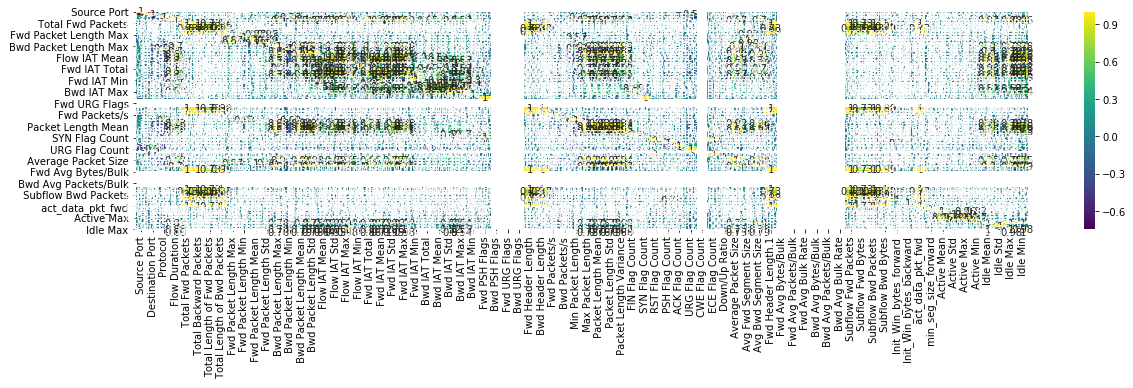

In [10]:
plt.figure(figsize=(20,4))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [11]:
df.isnull().sum().sum()

1008

In [12]:
df[' Label'].unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed'], dtype=object)

In [13]:
benign_indexes = df[df[' Label'] == "BENIGN"].index

In [14]:
len(benign_indexes)

440031

In [15]:
malicious_indexes = df[df[' Label'] != "BENIGN"].index

In [16]:
len(malicious_indexes)

252672

In [17]:
df['label'] = df[' Label'].map({'BENIGN':1,'DoS slowloris':0, 'DoS Slowhttptest':0,'DoS Slowhttptest':0,'DoS Hulk':0,'DoS GoldenEye':0,'Heartbleed':0})

In [18]:
df[['label',' Label']]

,label,Label
0,1,BENIGN
1,1,BENIGN
2,1,BENIGN
3,1,BENIGN
4,1,BENIGN
...,...,...
692698,1,BENIGN
692699,1,BENIGN
692700,1,BENIGN
692701,1,BENIGN


In [19]:
df = df.drop(' Label', axis=1)

In [20]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,192.168.10.14-209.48.71.168-49459-80-6,192.168.10.14,49459,209.48.71.168,80,6,5/7/2017 8:42,38308,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,192.168.10.3-192.168.10.17-389-49453-6,192.168.10.17,49453,192.168.10.3,389,6,5/7/2017 8:42,479,11,5,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,192.168.10.3-192.168.10.17-88-46124-6,192.168.10.17,46124,192.168.10.3,88,6,5/7/2017 8:42,1095,10,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,192.168.10.3-192.168.10.17-389-49454-6,192.168.10.17,49454,192.168.10.3,389,6,5/7/2017 8:42,15206,17,12,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,192.168.10.3-192.168.10.17-88-46126-6,192.168.10.17,46126,192.168.10.3,88,6,5/7/2017 8:42,1092,9,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [21]:
df.select_dtypes(['object']).columns

Index(['Flow ID', ' Source IP', ' Destination IP', ' Timestamp',
       'Flow Bytes/s', ' Flow Packets/s'],
      dtype='object')

In [22]:
df['Flow Bytes/s'].value_counts()

0                     63285
0.0                   49982
4000000                5559
3000000                2245
1.03E+07               2045
                      ...  
123.5411528               1
469.5898065               1
121.08205659999999        1
16599.51505               1
121.8841365               1
Name: Flow Bytes/s, Length: 456531, dtype: int64

In [23]:
df[' Flow Packets/s'].value_counts()

666666.6667    28265
500000         16928
2000000        12633
1000000         5923
400000          2344
               ...  
0.140149121        1
5.413494556        1
0.542588557        1
0.130273894        1
7.096275165        1
Name:  Flow Packets/s, Length: 391842, dtype: int64

In [24]:
df = df.drop('Flow ID', axis=1)

In [25]:
df = df.drop(' Source IP', axis=1)

In [26]:
df = df.drop(' Destination IP', axis=1)

In [27]:
df = df.drop(' Timestamp', axis=1)

In [28]:
df.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,49459,80,6,38308,1,1,6,6.0,6,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,49453,389,6,479,11,5,172,326.0,79,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,46124,88,6,1095,10,6,3150,3150.0,1575,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,49454,389,6,15206,17,12,3452,6660.0,1313,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,46126,88,6,1092,9,6,3150,3152.0,1575,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


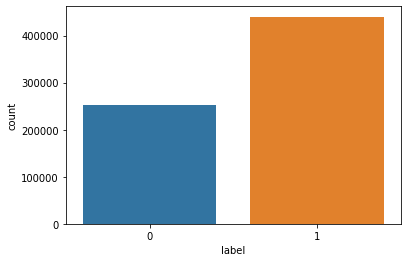

In [29]:
sns.countplot(x='label',data=df)

In [30]:
df = df.dropna()

In [31]:
df.isnull().sum().sum()

0

In [32]:
len(df)

691695

In [33]:
df['Flow Bytes/s'] = df['Flow Bytes/s'].astype(str).astype(float)

In [34]:
df['Flow Bytes/s'].value_counts()

0.000000e+00    113267
4.000000e+06      5994
3.000000e+06      2444
1.030000e+07      2185
1.200000e+07      1534
                 ...  
5.609366e+03         1
3.196347e+05         1
9.353672e+01         1
1.393905e+02         1
8.316680e+00         1
Name: Flow Bytes/s, Length: 452092, dtype: int64

In [35]:
df[' Flow Packets/s'] = df[' Flow Packets/s'].astype(str).astype(float)

In [36]:
df[' Flow Packets/s'].value_counts()

6.666667e+05    28688
5.000000e+05    17126
2.000000e+06    12726
1.000000e+06     5958
4.000000e+05     2348
                ...  
1.741147e-01        1
4.903783e-01        1
1.311201e-01        1
1.206554e-01        1
2.750275e+02        1
Name:  Flow Packets/s, Length: 387943, dtype: int64

In [37]:
df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,49459,80,6,38308,1,1,6,6.0,6,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,49453,389,6,479,11,5,172,326.0,79,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,46124,88,6,1095,10,6,3150,3150.0,1575,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,49454,389,6,15206,17,12,3452,6660.0,1313,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,46126,88,6,1092,9,6,3150,3152.0,1575,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,51114,53,17,32215,4,2,112,152.0,28,28,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
692699,24054,53,17,324,2,2,84,362.0,42,42,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
692700,443,58030,6,82,2,1,31,6.0,31,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
692701,51694,53,17,1048635,6,2,192,256.0,32,32,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [38]:
# Instead of dropping rows which contain any nulls and infinite numbers, 
# it is more succinct to the reverse the logic of that and instead 
#return the rows where all cells are finite numbers. 
#The numpy isfinite function does this and the '.all(1)' will only return a 
#TRUE if all cells in row are finite.
df = df[np.isfinite(df).all(1)]

In [39]:
len(df)

691406

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop('label',axis=1).values
y = df['label'].values

In [42]:
# # Taking 0.1 fraction of df
# df = df.sample(frac=0.1,random_state=101)
# print(len(df))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
X_train = scaler.fit_transform(X_train)

In [47]:
X_test = scaler.transform(X_test)

In [48]:
X_train.shape

(553124, 80)

In [49]:
X_test.shape

(138282, 80)

In [50]:
y_train.shape

(553124,)

In [51]:
y_test.shape

(138282,)

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [53]:
model = Sequential()

# input layer
model.add(Dense(80,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 553124 samples, validate on 138282 samples
Epoch 1/25
553124/553124 [==============================] - 4s 8us/sample - loss: 0.0672 - val_loss: 0.0360
Epoch 2/25
553124/553124 [==============================] - 4s 8us/sample - loss: 0.0294 - val_loss: 0.0174
Epoch 3/25
553124/553124 [==============================] - 4s 7us/sample - loss: 0.0197 - val_loss: 0.0145
Epoch 4/25
553124/553124 [==============================] - 4s 8us/sample - loss: 0.0162 - val_loss: 0.0128
Epoch 5/25
553124/553124 [==============================] - 4s 8us/sample - loss: 0.0145 - val_loss: 0.0133
Epoch 6/25
553124/553124 [==============================] - 4s 8us/sample - loss: 0.0135 - val_loss: 0.0113
Epoch 7/25
553124/553124 [==============================] - 4s 8us/sample - loss: 0.0132 - val_loss: 0.0118
Epoch 8/25
553124/553124 [==============================] - 4s 8us/sample - loss: 0.0126 - val_loss: 0.0113
Epoch 9/25
553124/553124 [==============================] - 4s 8us/sample - loss: 0.

In [55]:
from tensorflow.keras.models import load_model

In [56]:
model.save('dos_attack_final.h5')

In [57]:
losses = pd.DataFrame(model.history.history)

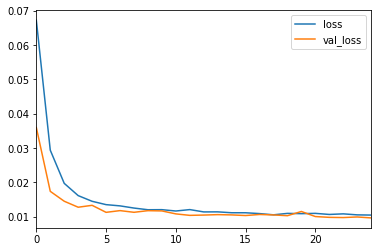

In [58]:
losses[['loss','val_loss']].plot()

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
predictions = model.predict_classes(X_test)

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     50402
           1       1.00      1.00      1.00     87880

    accuracy                           1.00    138282
   macro avg       1.00      1.00      1.00    138282
weighted avg       1.00      1.00      1.00    138282



In [62]:
confusion_matrix(y_test,predictions)

array([[50388,    14],
       [  384, 87496]])

In [63]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new = df.drop('label',axis=1).iloc[random_ind]
new

 Source Port          42159.0
 Destination Port        53.0
 Protocol                17.0
 Flow Duration        18081.0
 Total Fwd Packets        2.0
                       ...   
 Active Min               0.0
Idle Mean                 0.0
 Idle Std                 0.0
 Idle Max                 0.0
 Idle Min                 0.0
Name: 610627, Length: 80, dtype: float64

In [64]:
model.predict_classes(new.values.reshape(1,80))

array([[1]], dtype=int32)

In [65]:
df.iloc[random_ind]['label']

1.0

In [66]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,692693,692694,692695,692696,692697,692698,692699,692700,692701,692702
Source Port,49459.0,49453.0,46124.0,49454.0,46126.0,49460.0,46131.0,37380.0,49413.0,49666.0,...,49378.0,80.0,53123.0,45756.0,80.0,51114.0,24054.0,443.0,51694.0,57949.0
Destination Port,80.0,389.0,88.0,389.0,88.0,389.0,88.0,80.0,49666.0,49413.0,...,53.0,35450.0,53.0,80.0,49346.0,53.0,53.0,58030.0,53.0,53.0
Protocol,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,17.0,6.0,17.0,6.0,6.0,17.0,17.0,6.0,17.0,17.0
Flow Duration,38308.0,479.0,1095.0,15206.0,1092.0,433.0,1088.0,579225.0,3.0,4.0,...,158.0,33.0,46982.0,11512230.0,145.0,32215.0,324.0,82.0,1048635.0,94939.0
Total Fwd Packets,1.0,11.0,10.0,17.0,9.0,11.0,9.0,132.0,2.0,3.0,...,2.0,1.0,2.0,5.0,1.0,4.0,2.0,2.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6506213.0,0.0,0.0,0.0,0.0,0.0,0.0
Idle Std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Idle Max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6506213.0,0.0,0.0,0.0,0.0,0.0,0.0
Idle Min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6506213.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
new0 = df.drop('label',axis=1).iloc[0]

In [68]:
new0

 Source Port          49459.0
 Destination Port        80.0
 Protocol                 6.0
 Flow Duration        38308.0
 Total Fwd Packets        1.0
                       ...   
 Active Min               0.0
Idle Mean                 0.0
 Idle Std                 0.0
 Idle Max                 0.0
 Idle Min                 0.0
Name: 0, Length: 80, dtype: float64

In [69]:
new0 = scaler.transform(new0.values.reshape(-1, 80))

In [70]:
new0

array([[7.54695964e-01, 1.22161650e-03, 3.52941176e-01, 3.19241669e-04,
        0.00000000e+00, 3.69546419e-06, 4.90165643e-06, 9.56937799e-09,
        2.41740532e-04, 2.90556901e-03, 1.29289236e-03, 0.00000000e+00,
        3.07219662e-04, 3.02571861e-03, 1.37278205e-03, 0.00000000e+00,
        5.76383922e-03, 4.00010442e-01, 3.19241664e-04, 0.00000000e+00,
        3.19241664e-04, 3.19349963e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.66666622e-08, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.33544642e-06, 3.69546419e-06, 8.70140267e-06, 1.30521040e-05,
        4.14364641e-03, 2.41740532e-04, 2.67725427e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.32558140e-02, 3.72773713e-03, 1.292892

In [71]:
model.predict(new0)

array([[0.9999845]], dtype=float32)

In [100]:
df.iloc[256820]

 Source Port          51968.0
 Destination Port        80.0
 Protocol                 6.0
 Flow Duration          228.0
 Total Fwd Packets        2.0
                       ...   
Idle Mean                 0.0
 Idle Std                 0.0
 Idle Max                 0.0
 Idle Min                 0.0
label                     0.0
Name: 257589, Length: 81, dtype: float64

In [101]:
new256820 = df.drop('label',axis=1).iloc[256820]

In [102]:
new256820

 Source Port          51968.0
 Destination Port        80.0
 Protocol                 6.0
 Flow Duration          228.0
 Total Fwd Packets        2.0
                       ...   
 Active Min               0.0
Idle Mean                 0.0
 Idle Std                 0.0
 Idle Max                 0.0
 Idle Min                 0.0
Name: 257589, Length: 80, dtype: float64

In [103]:
new256820 = scaler.transform(new256820.values.reshape(-1, 80))

In [104]:
model.predict(new256820)

array([[0.07869065]], dtype=float32)